In [7]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Step 1: Load movie metadata
item_path = "/Users/anirudhravipudi/Desktop/AI/Practice/ml-100k/u.item"

# Define genre columns from MovieLens documentation
genre_cols = ['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy',
              'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
              'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

movie_df = pd.read_csv(item_path, sep='|', encoding='ISO-8859-1', header=None,
                       names=['movie_id', 'title', 'release_date', 'video_release', 'IMDb_URL'] + genre_cols,
                       usecols=[0, 1] + list(range(5, 24)))

# Step 2: Load user ratings
rating_path = "/Users/anirudhravipudi/Desktop/AI/Practice/ml-100k/u.data"
ratings_df = pd.read_csv(rating_path, sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])

# Step 3: Filter user ratings — let's pick user 196
user_id = 196
# Normalize ratings by subtracting the user's average rating
user_avg_rating = user_movies['rating'].mean()
weights = (user_movies['rating'] - user_avg_rating).values.reshape(-1, 1)

# Merge with movie genre info
user_movies = pd.merge(user_ratings, movie_df, on='movie_id')

# Step 4: Build user profile (weighted sum of genre vectors based on user's ratings)
genre_data = user_movies[genre_cols].values
weights = user_movies['rating'].values.reshape(-1, 1)

user_profile = np.dot(genre_data.T, weights).flatten()

# Step 5: Normalize user profile
user_profile_norm = user_profile / np.linalg.norm(user_profile)

# Step 6: Compute similarity of all movies to user profile
all_genres = movie_df[genre_cols].values
similarities = cosine_similarity([user_profile_norm], all_genres).flatten()

# Step 7: Recommend top N (excluding already rated)
movie_df['similarity'] = similarities
recommended = movie_df[~movie_df['movie_id'].isin(user_movies['movie_id'])]
top_recs = recommended.sort_values(by='similarity', ascending=False).head(10)

# Display recommendations
print("🎬 Top 10 Genre-Based Recommendations for User 196:")
for index, row in top_recs.iterrows():
    print(f"{row['title']} — Similarity Score: {row['similarity']:.2f}")

🎬 Top 10 Genre-Based Recommendations for User 196:
Cinema Paradiso (1988) — Similarity Score: 0.88
What Happened Was... (1994) — Similarity Score: 0.88
Corrina, Corrina (1994) — Similarity Score: 0.88
I Like It Like That (1994) — Similarity Score: 0.88
Brassed Off (1996) — Similarity Score: 0.88
Twelfth Night (1996) — Similarity Score: 0.88
Don Juan DeMarco (1995) — Similarity Score: 0.88
Something to Talk About (1995) — Similarity Score: 0.88
Wings of Desire (1987) — Similarity Score: 0.88
Manhattan (1979) — Similarity Score: 0.88


In [3]:
weights = user_movies['rating'].values.reshape(-1, 1)

In [5]:
# Normalize ratings by subtracting the user's average rating
user_avg_rating = user_movies['rating'].mean()
weights = (user_movies['rating'] - user_avg_rating).values.reshape(-1, 1)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Simulate text tags using title + genres
def generate_tags(row):
    tags = row['title']
    for genre in genre_cols:
        if row[genre] == 1:
            tags += f" {genre}"
    return tags.lower()

movie_df['tags'] = movie_df.apply(generate_tags, axis=1)

# Step 2: TF-IDF vectorization on tags
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movie_df['tags'])

# Step 3: Build user profile from liked movie TF-IDF vectors
liked_movie_ids = user_movies['movie_id'].values
liked_indices = movie_df[movie_df['movie_id'].isin(liked_movie_ids)].index
user_profile_vector = tfidf_matrix[liked_indices].mean(axis=0).A1  # A1 flattens it

# Step 4: Compute cosine similarity to all movies
cosine_similarities = cosine_similarity([user_profile_vector], tfidf_matrix).flatten()
movie_df['tfidf_similarity'] = cosine_similarities

# Step 5: Recommend top N (excluding already liked movies)
recommended = movie_df[~movie_df['movie_id'].isin(liked_movie_ids)]
top_tfidf_recs = recommended.sort_values(by='tfidf_similarity', ascending=False).head(10)

# Print top 10 results
print("\n🎯 Top 10 Content-Based Recommendations (TF-IDF Tag Matching):")
for _, row in top_tfidf_recs.iterrows():
    print(f"{row['title']} — Score: {row['tfidf_similarity']:.2f}")


🎯 Top 10 Content-Based Recommendations (TF-IDF Tag Matching):
Two Much (1996) — Score: 0.66
She's the One (1996) — Score: 0.66
I.Q. (1994) — Score: 0.50
Only You (1994) — Score: 0.50
B*A*P*S (1997) — Score: 0.47
In & Out (1997) — Score: 0.47
Love Is All There Is (1996) — Score: 0.41
Two if by Sea (1996) — Score: 0.38
Brassed Off (1996) — Score: 0.36
Michael (1996) — Score: 0.36


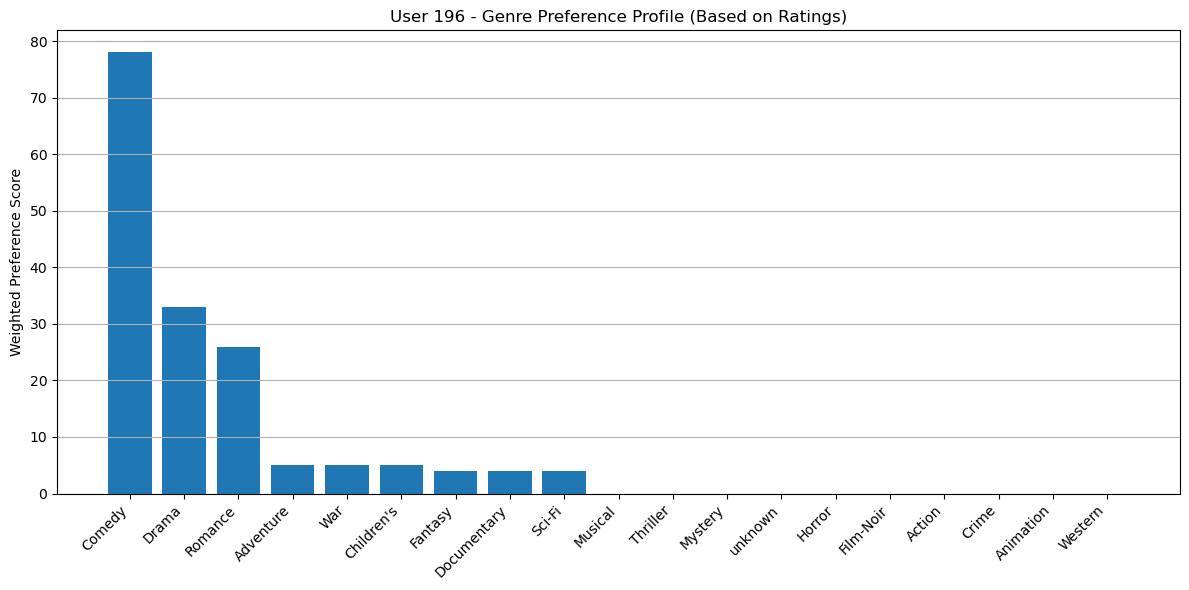

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load movie data
item_path = "/Users/anirudhravipudi/Desktop/AI/Practice/ml-100k/u.item"
rating_path = "/Users/anirudhravipudi/Desktop/AI/Practice/ml-100k/u.data"

genre_cols = ['unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy',
              'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
              'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

movie_df = pd.read_csv(item_path, sep='|', encoding='ISO-8859-1', header=None,
                       names=['movie_id', 'title', 'release_date', 'video_release', 'IMDb_URL'] + genre_cols,
                       usecols=[0, 1] + list(range(5, 24)))

ratings_df = pd.read_csv(rating_path, sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])

# Filter for user 196 and high-rated movies (4+)
user_id = 196
user_ratings = ratings_df[ratings_df['user_id'] == user_id]
high_rated = user_ratings[user_ratings['rating'] >= 4]
user_movies = pd.merge(high_rated, movie_df, on='movie_id')

# Calculate weighted genre preferences
genre_weights = {}
for genre in genre_cols:
    genre_weights[genre] = (user_movies[genre] * user_movies['rating']).sum()

# Convert to DataFrame and plot
genre_pref_df = pd.DataFrame(list(genre_weights.items()), columns=['Genre', 'Weighted Preference'])
genre_pref_df = genre_pref_df.sort_values(by='Weighted Preference', ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(genre_pref_df['Genre'], genre_pref_df['Weighted Preference'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Weighted Preference Score')
plt.title('User 196 - Genre Preference Profile (Based on Ratings)')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [21]:
# Export top 10 TF-IDF-based recommendations to CSV
top_tfidf_recs[['title', 'tfidf_similarity', 'tags']].to_csv("User196_Top10_TFIDF_Recommendations.csv", index=False)
print("✅ Export complete: 'User196_Top10_TFIDF_Recommendations.csv'")

✅ Export complete: 'User196_Top10_TFIDF_Recommendations.csv'


In [23]:
# Export to a specific location on your system
output_path = "/Users/anirudhravipudi/Desktop/AI/Practice/User196_Top10_TFIDF_Recommendations.csv"
top_tfidf_recs[['title', 'tfidf_similarity', 'tags']].to_csv(output_path, index=False)

print(f"✅ Export complete: File saved to:\n{output_path}")

✅ Export complete: File saved to:
/Users/anirudhravipudi/Desktop/AI/Practice/User196_Top10_TFIDF_Recommendations.csv
